In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
a = np.random.normal(0,1,size = 10)

In [3]:
print(a)

[ 1.15080252  0.74008324 -0.70911604 -0.54157912  1.28717505 -0.35953926
 -1.07756555  0.78365683  0.63822944 -0.29459654]


Since $X$ is a random variable uniformly distributed on $[0,1)$ we get

\begin{align*}
P(X - \epsilon \geq 0)
=
1 - P(X - \epsilon < 0)
=
1 - P(X \leq \epsilon)
=
1 - \epsilon
\end{align*}

In [4]:
k = 10
steps = 1000
runs = 1000
epsilon_arr = [0,0.01,0.1]
optimal_action = np.argmax(a)

In [5]:
def bandit(k,steps,runs,epsilon,optimal_action):
    
    reward_steps = np.zeros(steps+1)
    is_optimal = np.zeros(steps+1)
    
    for j in range(runs):
        Q = np.zeros(k)
        N = np.zeros(k)
        for i in range(steps):
            maxim = Q[0]-1
            if random.random()-epsilon >= 0:         #Take greedy action
                for j in range(k):            #Find the argmax and break ties randomly
                    if Q[j] > maxim:            #A = np.argmax(Q) would always take the first
                        index = []
                        index.append(j)
                        maxim = Q[j]
                    elif Q[j] == maxim:
                        index.append(j)
                A = index[random.randint(0,len(index)-1)]
                        
            else:                             #Take arbitrary action    
                A = random.randint(0,k-1)
                
            R = np.random.normal(a[A],1)      #Reward as specified
            N[A] += 1
            Q[A] += (R-Q[A])/N[A]
            
            reward_steps[i+1] += R
            if A == optimal_action:
                is_optimal[i+1] += 1
         
    reward_steps = reward_steps/runs
    is_optimal = is_optimal/runs

    return reward_steps, is_optimal

In [6]:
plt.rcParams["figure.figsize"] = (15,10)

In [7]:
rewards = []
optimal_actions = []
for epsilon in epsilon_arr:
    re, opt = bandit(k,steps,runs,epsilon,optimal_action)
    rewards.append(re)
    optimal_actions.append(opt)

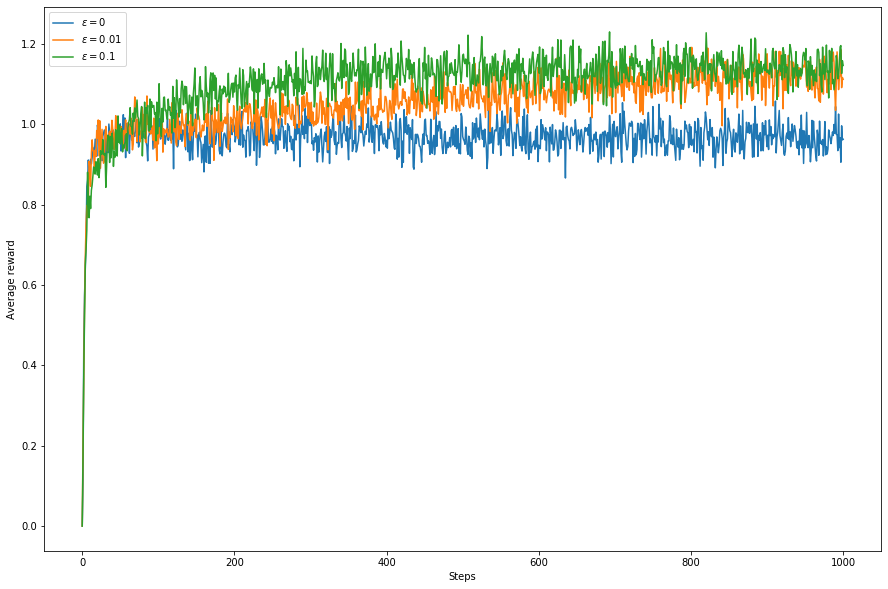

In [8]:
for epsilon, reward in zip(epsilon_arr,rewards):
    plt.plot([i for i in range(steps+1)],reward,label =f"$\epsilon = {epsilon}$")

plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.legend()
plt.show()

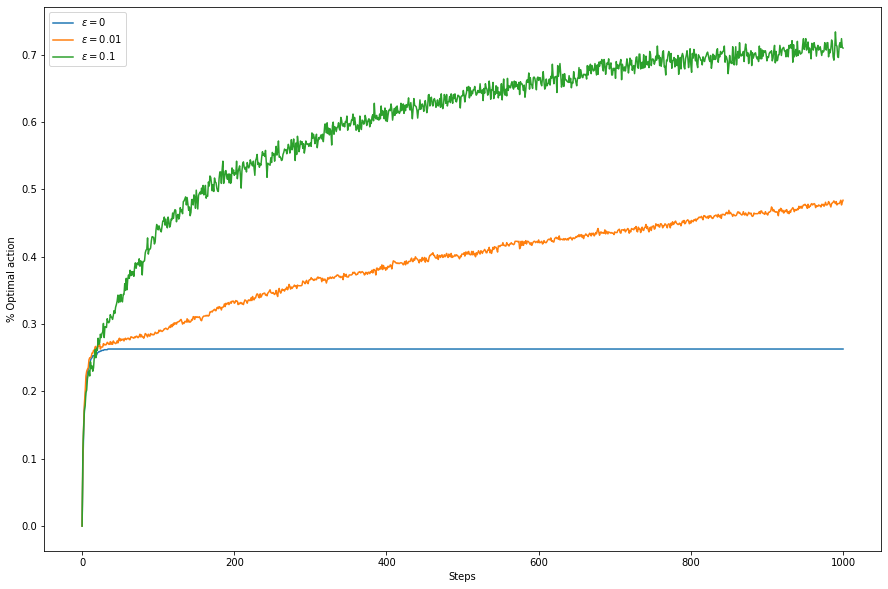

In [9]:
for epsilon,optimum in zip(epsilon_arr,optimal_actions):
    plt.plot([i for i in range(steps+1)],optimum ,label =f"$\epsilon = {epsilon}$")

plt.xlabel("Steps")
plt.ylabel("% Optimal action")
plt.legend()
plt.show()